In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import random
from pandas import DataFrame
from datetime import datetime
import matplotlib
from matplotlib import pyplot as plt

from sklearn.metrics import r2_score

# input file path
datasetdir = "D://indivdual_models//Dataset//2022_MC9K_single_drug"
resultdir = "D://indivdual_models//Result//Model_generation//2022_MC9K_single_drug"

In [2]:
drug_list = ["AEW541","Nilotinib","17-AAG","PHA-665752","Lapatinib","Nutlin-3"
            ,"AZD0530","PF2341066","L-685458","ZD-6474","Panobinostat","Sorafenib"
            ,"Irinotecan","Topotecan","LBW242","PD-0325901","PD-0332991","Paclitaxel"
            ,"PLX4720","RAF265","TAE684","TKI258","Erlotinib","AZD6244"]

Starttime: 20221007
AEW541_//n
train_X shape: (303, 21213)
303 train samples
75 test samples
StartTime : 2022-10-07 15:56:21.450547
EndTime : 2022-10-07 15:56:24.425821
AEW541’s final rmse value is = 1.002751
AEW541 R-squared value is = -0.371329
Nilotinib_//n
train_X shape: (248, 21213)
248 train samples
61 test samples
StartTime : 2022-10-07 15:56:25.329203
EndTime : 2022-10-07 15:56:27.584430
Nilotinib’s final rmse value is = 1.018803
Nilotinib R-squared value is = -0.064717
17-AAG_//n
train_X shape: (302, 21213)
302 train samples
75 test samples
StartTime : 2022-10-07 15:56:28.206183
EndTime : 2022-10-07 15:56:31.276310
17-AAG’s final rmse value is = 1.722929
17-AAG R-squared value is = -0.013767
PHA-665752_//n
train_X shape: (302, 21213)
302 train samples
75 test samples
StartTime : 2022-10-07 15:56:32.028769
EndTime : 2022-10-07 15:56:34.172733
PHA-665752’s final rmse value is = 0.349047
PHA-665752 R-squared value is = 0.000164
Lapatinib_//n
train_X shape: (303, 21213)
303 train 

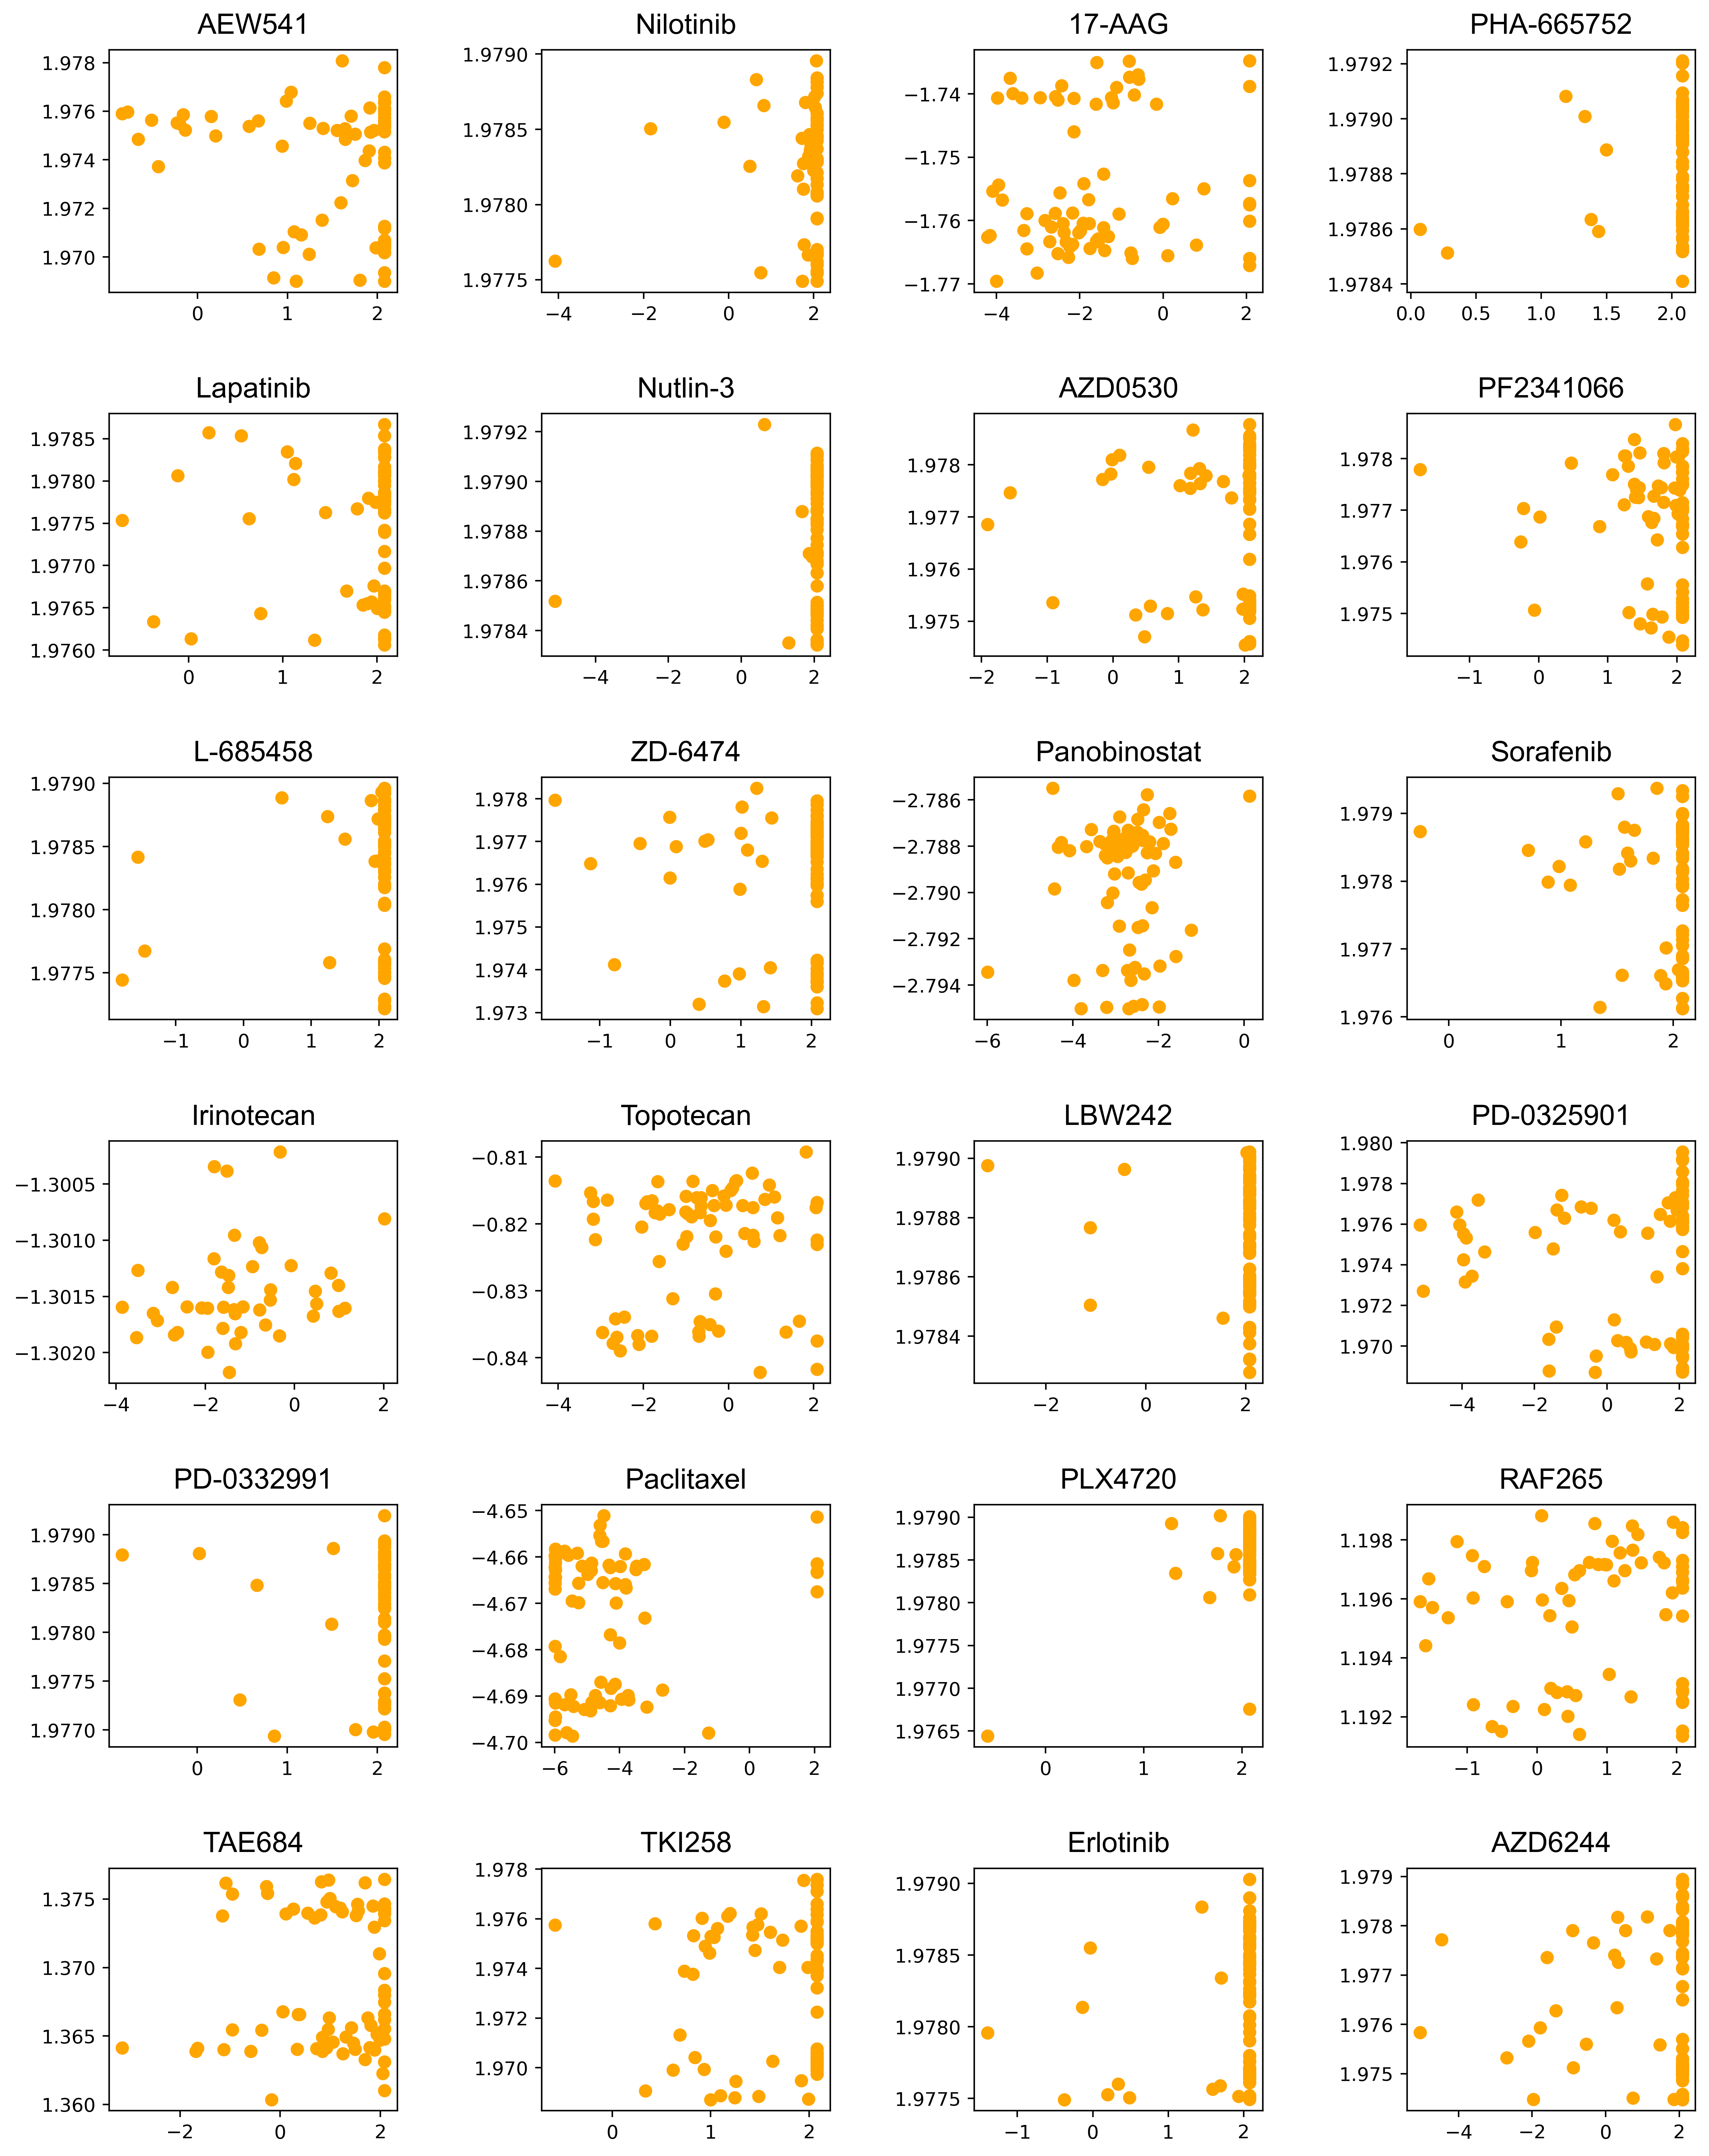

In [3]:
from datetime import datetime
now = datetime.now()
day = now.strftime("%Y%m%d")
print("Starttime: " + day)

rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1
for dname in drug_list:
    
    print('%s_//n' % dname)
    # read input file and index file for training and test set
    dataset = np.load(datasetdir + "//MC9K_%s.npz" % dname)
    ss0 = np.load(datasetdir + '//MC9K_%s_0_8_2.npz' % dname)

    # input and index file assign
    x = dataset['x']
    y = dataset['y']
    # y_linear = dataset['y_lnIC50']
    ss0_train = ss0['train']
    ss0_test = ss0['test']
    
    # training and test dataset assign
    train_X, train_y = x[ss0_train], y[ss0_train]
    test_X, test_y = x[ss0_test], y[ss0_test]

    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # model fitting
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    svr_lin = SVR(C=0.01)
    svr_lin.fit(train_X, train_y).predict(test_X)
    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)
    
    predicted_classes = svr_lin.predict(test_X)
    predicted_value = predicted_classes
    
    import pickle
    import joblib
    joblib.dump(svr_lin, resultdir + '//SVR//MC9K_SVR_%s.pkl' % dname) 
    
    
    # saving predicted ln(IC50)s and ln(IC50)s in the test set
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    c.to_csv(resultdir + '//SVR//predicted_table//MC9K_SVR_%s_pred_and_val_result.csv' % dname, index=False)


    # RMSE
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    
    # R-squared value
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num)
    plt.scatter(test_y,predicted_value,c='orange')
    plt.title(dname,fontdict ={'fontsize' : 15},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=10)
    
    num += 1
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    

figdir = "D://indivdual_models//Result//Figure"
plt.savefig(figdir +'//MC9K_single_drug_SVR_plot.png', dpi=400)

In [4]:
num

25

In [5]:
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

In [6]:
result

,Drug,RMSE,R2value
0,AEW541,1.002751,-0.371329
1,Nilotinib,1.018803,-0.064717
2,17-AAG,1.722929,-0.013767
3,PHA-665752,0.349047,0.000164
4,Lapatinib,0.663189,-0.085725
5,Nutlin-3,0.843485,-0.001665
6,AZD0530,0.950942,-0.173236
7,PF2341066,0.750393,-0.223693
8,L-685458,0.762125,-0.020843
9,ZD-6474,0.923682,-0.169276


In [7]:
result.to_csv(resultdir +'//MC9K_SVR_24drugs_metrics.csv', index=False)